### Titanic Kaggle - first try

---
#### Import data - train and test
---

In [21]:
import numpy as np
import pandas as pd

train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

print(train.head(10))
print(train.describe())
print(train.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   
5                                   Moran, Mr. James    male  NaN      0   
6                            McCarthy, Mr. Timothy J    male   54      

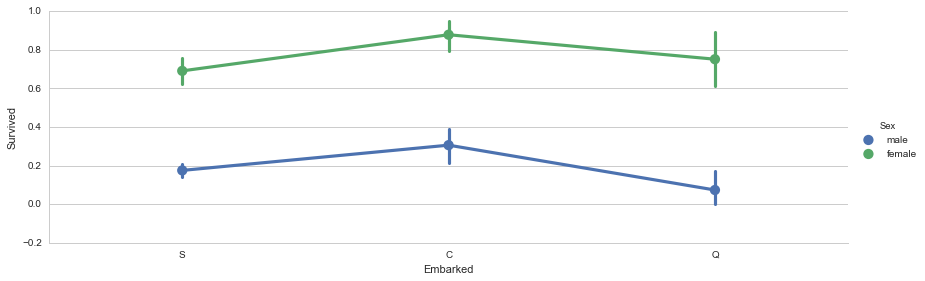

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

sns.factorplot(x='Embarked',y='Survived', data=train,size=4,aspect=3,kind="point",hue="Sex")
#sns.countplot(x='Embarked', data=train)

#fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
#sns.countplot(x='Embarked', data=train, ax=axis1)
#sns.countplot(x='Survived', hue="Embarked", data=train, order=[1,0], ax=axis2)



           0
0  22.117887
1  48.395408
           0
0  31.388207
1  66.596998
                  0
Survived           
0         22.117887
1         48.395408


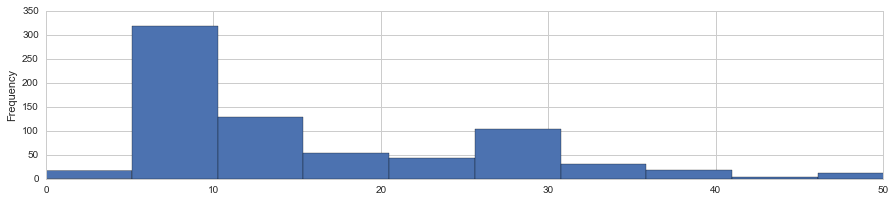

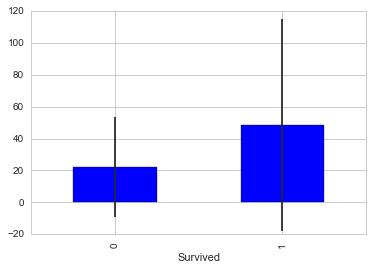

In [49]:
fare_not_survived = train["Fare"][train["Survived"] == 0]
fare_survived     = train["Fare"][train["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
print(average_fare)
std_fare      = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
print(std_fare)

# plot
train['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

average_fare.index.names = std_fare.index.names = ["Survived"]
print(average_fare)
average_fare.plot(yerr=std_fare,kind='bar',legend=False)

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80]


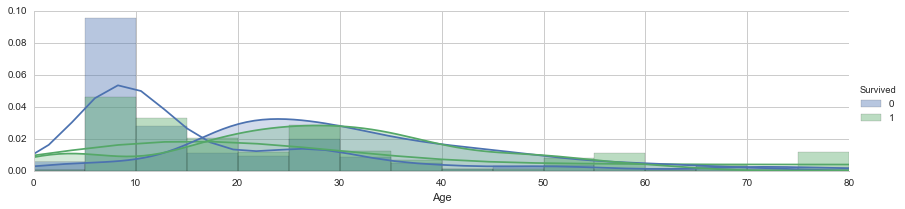

In [18]:
# peaks for survived/not survived passengers by their age
bins = np.arange(0, 85, 5)
print(bins)
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.distplot,'Fare',bins=bins)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()


C:\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


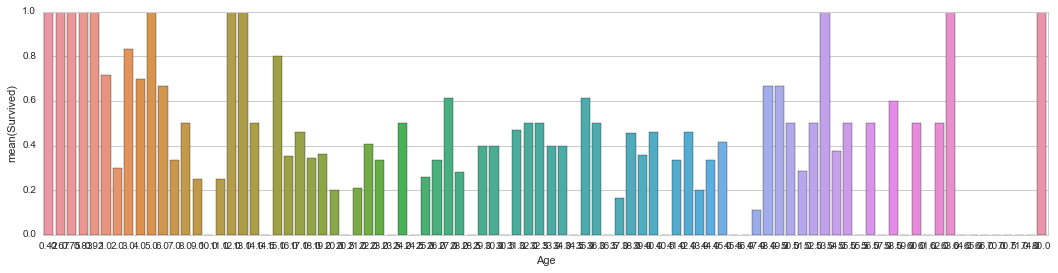

In [5]:
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)
